# Student Mark Forudsigelse

### Belastning and Dataforarbejdning

In [1]:
import pandas as pd
import os
datapath = os.path.join("../Journal-04", "", "")
dataset = pd.read_csv(datapath + "StudentsPerformance.csv")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# To check data types and see if there are any missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Model selection and training

In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import joblib

X = dataset[['gender', 'parental level of education', 'test preparation course']]
y_math = dataset['math score']
y_reading = dataset['reading score']
y_writing = dataset['writing score']

X = pd.get_dummies(X, columns=['gender', 'parental level of education', 'test preparation course'])

X_train_math, X_test_math, y_math_train, y_math_test = train_test_split(X, y_math, test_size=0.2, random_state=42)

# Create and train the SVM model for math score
svm_math = SVR(kernel='linear')
svm_math.fit(X_train_math, y_math_train)

X_train_reading, X_test_reading, y_reading_train, y_reading_test = train_test_split(X, y_reading, test_size=0.2, random_state=42)

svm_reading = SVR(kernel='linear')
svm_reading.fit(X_train_reading, y_reading_train)

X_train_writing, X_test_writing, y_writing_train, y_writing_test = train_test_split(X, y_writing, test_size=0.2, random_state=42)

svm_writing = SVR(kernel='linear')
svm_writing.fit(X_train_writing, y_writing_train)

# User input data
user_data = {
    'gender_female': [0],  
    'gender_male': [1],    
    "parental level of education_associate's degree": [0],  
    "parental level of education_bachelor's degree": [1],
    'test preparation course_completed': [1]
}

# Convert user input into a DataFrame
user_df = pd.DataFrame(user_data)
user_df = user_df.reindex(columns=X.columns, fill_value=0)

math_predictions = svm_math.predict(user_df)
reading_predictions = svm_reading.predict(user_df)
writing_predictions = svm_writing.predict(user_df)

mae_math = mean_absolute_error(y_math_test, svm_math.predict(X_test_math))
mae_reading = mean_absolute_error(y_reading_test, svm_reading.predict(X_test_reading))
mae_writing = mean_absolute_error(y_writing_test, svm_writing.predict(X_test_writing))

# Print predictions
print("Math Score Prediction:", math_predictions)
print("Reading Score Prediction:", reading_predictions)
print("Writing Score Prediction:", writing_predictions)

print("Mean Absolute Error (Math):", mae_math)
print("Mean Absolute Error (Reading):", mae_reading)
print("Mean Absolute Error (Writing):", mae_writing)

# Save models
joblib.dump(svm_math, 'svm_math_model.pkl')
joblib.dump(svm_reading, 'svm_reading_model.pkl')
joblib.dump(svm_writing, 'svm_writing_model.pkl')

Math Score Prediction: [75.09966783]
Reading Score Prediction: [73.89981428]
Writing Score Prediction: [74.36625581]
Mean Absolute Error (Math): 12.027899739599361
Mean Absolute Error (Reading): 11.440642492738426
Mean Absolute Error (Writing): 10.833399473461727


['svm_writing_model.pkl']

In [4]:
from sklearn.neural_network import MLPRegressor

# Create and train the MLP model for math score
mlp_math = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp_math.fit(X_train_math, y_math_train)

# Create and train the MLP model for reading score
mlp_reading = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp_reading.fit(X_train_reading, y_reading_train)

# Create and train the MLP model for writing score
mlp_writing = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp_writing.fit(X_train_writing, y_writing_train)

# User input data
user_data = {
    'gender_female': [0],
    'gender_male': [1],
    "parental level of education_associate's degree": [0],
    "parental level of education_bachelor's degree": [1],
    'test preparation course_completed': [1]
}

# Convert user input into a DataFrame
user_df = pd.DataFrame(user_data)
user_df = user_df.reindex(columns=X.columns, fill_value=0)

# Predictions using MLP models
math_predictions_mlp = mlp_math.predict(user_df)
reading_predictions_mlp = mlp_reading.predict(user_df)
writing_predictions_mlp = mlp_writing.predict(user_df)

# Print MLP predictions
print("MLP Math Score Prediction:", math_predictions_mlp)
print("MLP Reading Score Prediction:", reading_predictions_mlp)
print("MLP Writing Score Prediction:", writing_predictions_mlp)

# Evaluate MLP models
mae_math_mlp = mean_absolute_error(y_math_test, mlp_math.predict(X_test_math))
mae_reading_mlp = mean_absolute_error(y_reading_test, mlp_reading.predict(X_test_reading))
mae_writing_mlp = mean_absolute_error(y_writing_test, mlp_writing.predict(X_test_writing))

# Print MLP mean absolute errors
print("MLP Mean Absolute Error (Math):", mae_math_mlp)
print("MLP Mean Absolute Error (Reading):", mae_reading_mlp)
print("MLP Mean Absolute Error (Writing):", mae_writing_mlp)

# Save MLP models
joblib.dump(mlp_math, 'mlp_math_model.pkl')
joblib.dump(mlp_reading, 'mlp_reading_model.pkl')
joblib.dump(mlp_writing, 'mlp_writing_model.pkl')


MLP Math Score Prediction: [76.56074726]
MLP Reading Score Prediction: [74.63650267]
MLP Writing Score Prediction: [75.43437927]
MLP Mean Absolute Error (Math): 12.023169793298598
MLP Mean Absolute Error (Reading): 11.335080862677819
MLP Mean Absolute Error (Writing): 10.715085032445723


['mlp_writing_model.pkl']

# Visualizing of MAE and Prediction

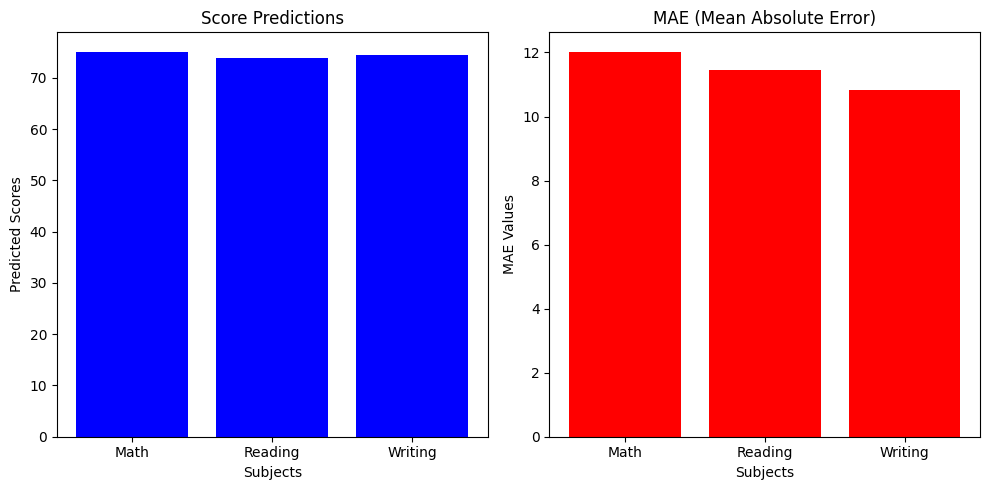

In [8]:
import matplotlib.pyplot as plt



subjects = ['Math', 'Reading', 'Writing']

# Create lists of predictions and MAE values
predictions = [math_predictions[0], reading_predictions[0], writing_predictions[0]]
mae_values = [mae_math, mae_reading, mae_writing]

# Create a bar chart
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.bar(subjects, predictions, color='blue')
plt.title('Score Predictions')
plt.xlabel('Subjects')
plt.ylabel('Predicted Scores')

plt.subplot(122)
plt.bar(subjects, mae_values, color='red')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Subjects')
plt.ylabel('MAE Values')

plt.tight_layout()
plt.show()

# Hyperparameter tuning using the Grid Search

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_math_train, y_math_test, y_reading_train, y_reading_test, y_writing_train, y_writing_test = train_test_split(
    X, y_math, y_reading, y_writing, test_size=0.2, random_state=42
)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
}

# Create a grid search for hyperparameter tuning
grid_search_math = GridSearchCV(svm_math, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_math.fit(X_train, y_math_train)

# Get the best hyperparameters
best_params_math = grid_search_math.best_params_

# Create a new SVR model with the best hyperparameters
best_svm_math = SVR(kernel='linear', C=best_params_math['C'], epsilon=best_params_math['epsilon'])
best_svm_math.fit(X_train, y_math_train)

# Make predictions with the best model
math_predictions = best_svm_math.predict(X_test)

# Evaluate the best model
mae_math = mean_absolute_error(y_math_test, math_predictions)

# Report the best hyperparameters and MAE
print("Best Hyperparameters for Math Model:", best_params_math)
print("Mean Absolute Error for Math Model:", )

Best Hyperparameters for Math Model: {'C': 1, 'epsilon': 0.2}
Mean Absolute Error for Math Model:


# Visualisering af Hyperparameter Grid Search

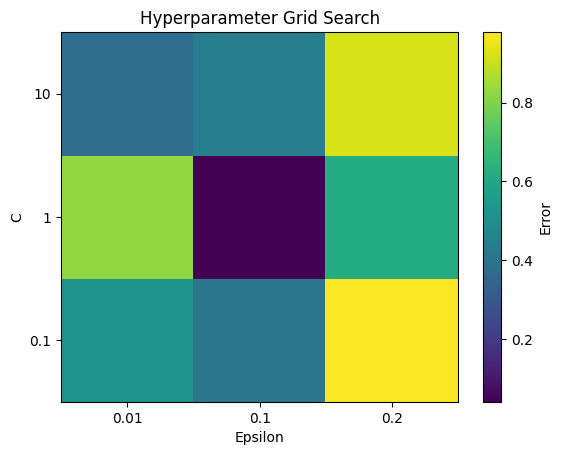

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid for 'C' and 'epsilon'
C_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.2]

# Create an empty grid for errors
error_grid = np.zeros((len(C_values), len(epsilon_values)))

# Sample error values (replace with actual error calculations)
for i in range(len(C_values)):
    for j in range(len(epsilon_values)):
        error = np.random.rand()  # Replace this with your actual error calculation
        error_grid[i, j] = error

# Create a heatmap
plt.imshow(error_grid, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Error')
plt.xticks(np.arange(len(epsilon_values)), epsilon_values)
plt.yticks(np.arange(len(C_values)), C_values)
plt.xlabel('Epsilon')
plt.ylabel('C')
plt.title('Hyperparameter Grid Search')
plt.show()
